In [53]:
import pandas as pd
import numpy as np
data=pd.read_csv("BlackFriday.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [55]:
data["Product_Category_2"].fillna(0, inplace=True)
data['Product_Category_3'].fillna(0, inplace=True)

In [56]:
data['Product_all']=data['Product_Category_1']+data['Product_Category_2']+data['Product_Category_3']

In [57]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [58]:
from datetime import datetime
data['User_ID']=data['User_ID'].astype('str')

In [59]:
data[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]=data[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('category')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  object  
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  object  
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  category
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  category
 8   Product_Category_1          537577 non-null  category
 9   Product_Category_2          537577 non-null  category
 10  Product_Category_3          537577 non-null  category
 11  Purchase                    537577 non-null  int64   
 12  Product_all                 537577 non-null  float64 
dtyp

In [61]:
data=pd.get_dummies(data, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   User_ID                        537577 non-null  object  
 1   Product_ID                     537577 non-null  object  
 2   Occupation                     537577 non-null  category
 3   Marital_Status                 537577 non-null  category
 4   Product_Category_1             537577 non-null  category
 5   Product_Category_2             537577 non-null  category
 6   Product_Category_3             537577 non-null  category
 7   Purchase                       537577 non-null  int64   
 8   Product_all                    537577 non-null  float64 
 9   Gender_F                       537577 non-null  uint8   
 10  Gender_M                       537577 non-null  uint8   
 11  Age_0-17                       537577 non-null  uint8   
 12  Age_18-25       

In [67]:
data.drop(columns=['User_ID', 'Product_ID', 'Product_all'], inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   Occupation                     537577 non-null  category
 1   Marital_Status                 537577 non-null  category
 2   Product_Category_1             537577 non-null  category
 3   Product_Category_2             537577 non-null  category
 4   Product_Category_3             537577 non-null  category
 5   Purchase                       537577 non-null  int64   
 6   Gender_F                       537577 non-null  uint8   
 7   Gender_M                       537577 non-null  uint8   
 8   Age_0-17                       537577 non-null  uint8   
 9   Age_18-25                      537577 non-null  uint8   
 10  Age_26-35                      537577 non-null  uint8   
 11  Age_36-45                      537577 non-null  uint8   
 12  Age_46-50       

In [75]:
data[['Occupation', 'Marital_Status', 'Product_Category_1','Product_Category_2','Product_Category_3']]=data[['Occupation', 'Marital_Status', 'Product_Category_1','Product_Category_2','Product_Category_3']].astype('int')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Occupation                     537577 non-null  int32
 1   Marital_Status                 537577 non-null  int32
 2   Product_Category_1             537577 non-null  int32
 3   Product_Category_2             537577 non-null  int32
 4   Product_Category_3             537577 non-null  int32
 5   Purchase                       537577 non-null  int64
 6   Gender_F                       537577 non-null  uint8
 7   Gender_M                       537577 non-null  uint8
 8   Age_0-17                       537577 non-null  uint8
 9   Age_18-25                      537577 non-null  uint8
 10  Age_26-35                      537577 non-null  uint8
 11  Age_36-45                      537577 non-null  uint8
 12  Age_46-50                      537577 non-null  uint8
 13 

In [78]:
from sklearn.metrics import calinski_harabasz_score

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for k in range(2,10):
    kmeans_model=KMeans(n_clusters=k, random_state=1).fit(data)
    labels=kmeans_model.labels_
    print(calinski_harabasz_score(data, labels))

1368390.2096502217
1649079.7088991164
2037114.241057666
2649332.3013422764
3570340.457711051
4358687.441211123
5284538.6996682575
5999517.924749474


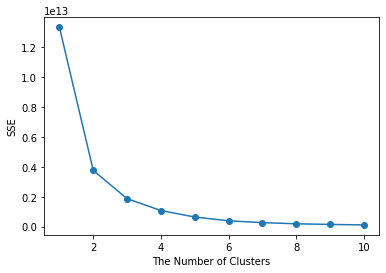

[13337646945132.234, 3761865914564.797, 1869258584233.9438, 1078365131963.7997, 643916404454.2217, 389899769815.23096, 268641449963.20813, 191048043702.8827, 147730187318.57355, 114990387011.12897]


In [81]:
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(data)

2->3으로 갈때 기울기 소실이 발생하므로 2-3개 군집이 적절한 것을 확인

k=3으로 지정하여 군집분석 진행

In [85]:
km=KMeans(n_clusters=3, random_state=0)
km.fit(data)
print(km.labels_)
data['cluster']=km.labels_

[2 0 1 ... 2 2 2]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

KeyboardInterrupt: 